In [1]:
import pandas as pd
import numpy as np

In [2]:
combined_labelled = pd.read_excel('labelled_topics_dataset_manual.xlsx')
combined_labelled.head()

,post_title,username,post_content,subreddit,topic_identified,topic_name,top_n_words,probability,throwaway,manual_topic,representative_words,non_marriage
0,My (22M) friend (22M) is getting married and I...,Familiar-Result-7590,"Hi guys, I'm trying to work on my communicatio...",r/relationship_advice,0,0_friend_relationship_know_would,friend - relationship - know - would - friends...,0.258273,False,0.0,NaN,NaN
1,Sexually incompatible?,Qrty19,TL;DR - Is a lack of sex enough of a reason to...,r/marriage_advice,2,2_sex_really_like_found,sex - really - like - found - porn - would - s...,0.370703,False,2.0,NaN,NaN
2,how to make decisions quickly together?,heretolearnlady,Tl;Dr\n\nMy husband and I have been unbelievab...,r/marriage_advice,4,4_divorce_years_separated_want,divorce - years - separated - want - together ...,0.373660,False,4.0,NaN,NaN
3,My fiancÃ© (25f) broke up with me (24m) and ca...,ebc0210,"I am a 24m, I dated my now ex-fiancÃ© (25f) fo...",r/relationship_advice,-1,-1_would_like_want_years,would - like - want - years - time - relations...,0.293431,False,4.0,NaN,NaN
4,"How to split ""unsplittable"" assets in prenup?",None,tl;dr - How do you split investments in a prop...,r/marriage_advice,-1,-1_would_like_want_years,would - like - want - years - time - relations...,0.247616,False,4.0,NaN,NaN


In [3]:
married_combined_labelled = combined_labelled[combined_labelled.non_marriage != True]
married_combined_labelled = married_combined_labelled.reset_index(drop=True)
married_combined_labelled['manual_topic'] = married_combined_labelled['manual_topic'].astype(int)
married_combined_labelled.head()
print(married_combined_labelled.shape)

married_throwaway_labelled = married_combined_labelled[married_combined_labelled.throwaway == True]
married_throwaway_labelled = married_throwaway_labelled.reset_index(drop=True)
print(married_throwaway_labelled.shape)

married_non_throwaway_labelled = married_combined_labelled[married_combined_labelled.throwaway == False]
married_non_throwaway_labelled = married_non_throwaway_labelled.reset_index(drop=True)
print(married_non_throwaway_labelled.shape)

(195, 12)
(95, 12)
(100, 12)


In [4]:
topic_representations_final = pd.read_excel('topic_representations_final.xlsx')
display(topic_representations_final)

,topic,topic_name,top_representative_words
0,0,Friendships/Past Relationships,"friend, relationship, ex, know, would, friends..."
1,1,Feelings/Emotions,"like, know, feel, things, years, time, never, ..."
2,2,Intimacy and Sexual desires,"sex, really, like, found, porn, would, said, f..."
3,3,Kids/Family,"kids, time, would, parents, like, family, get,..."
4,4,Separation/Divorce,"divorce, years, separated, want, together, dau..."
5,5,Time and Love,"time, day, home, would, told, know, work, get,..."
6,6,Communications,"talk, communicating, know, compliments, also, ..."
7,7,Travel/Break,"love, years, trip, together, feel, time, want,..."
8,8,Smoking/substance use,"smoking, weed, feel, leave, sober, like, get, ..."
9,9,Job and Finances,"account, like, money, job, never, home, car, u..."


In [5]:
bert_topic_counts = married_combined_labelled['topic_identified'].value_counts().sort_index()
manual_topic_counts = married_combined_labelled['manual_topic'].value_counts().sort_index()
manual_topic_counts_thrw = married_throwaway_labelled['manual_topic'].value_counts().sort_index()
manual_topic_counts_non_thrw = married_non_throwaway_labelled['manual_topic'].value_counts().sort_index()
topic_representations_final['count_bert_topic'] = topic_representations_final['topic'].map(bert_topic_counts)
topic_representations_final['count_manual'] = topic_representations_final['topic'].map(manual_topic_counts)
topic_representations_final['count_thrw'] = topic_representations_final['topic'].map(manual_topic_counts_thrw)
topic_representations_final['count_non_thrw'] = topic_representations_final['topic'].map(manual_topic_counts_non_thrw)

In [6]:
display(topic_representations_final.sort_values(by=['count_manual'], ascending=False))

,topic,topic_name,top_representative_words,count_bert_topic,count_manual,count_thrw,count_non_thrw
1,1,Feelings/Emotions,"like, know, feel, things, years, time, never, ...",22.0,38,21,17
0,0,Friendships/Past Relationships,"friend, relationship, ex, know, would, friends...",35.0,27,14,13
3,3,Kids/Family,"kids, time, would, parents, like, family, get,...",16.0,27,12,15
2,2,Intimacy and Sexual desires,"sex, really, like, found, porn, would, said, f...",20.0,24,17,7
4,4,Separation/Divorce,"divorce, years, separated, want, together, dau...",14.0,20,7,13
6,6,Communications,"talk, communicating, know, compliments, also, ...",9.0,13,4,9
7,7,Travel/Break,"love, years, trip, together, feel, time, want,...",9.0,10,1,9
9,9,Job and Finances,"account, like, money, job, never, home, car, u...",4.0,10,5,5
5,5,Time and Love,"time, day, home, would, told, know, work, get,...",11.0,9,4,5
11,11,Cheating,"cheat, cheating, cheated, broken",NaN,7,4,3


In [7]:
final_representation = topic_representations_final.copy()
final_representation = final_representation.sort_values(by=['count_manual'], ascending=False)

In [8]:
final_representation = final_representation.drop(columns=['topic','count_bert_topic']).reset_index(drop=True)
final_representation = final_representation.rename(columns = {'count_manual': 'total_count'})
final_representation

,topic_name,top_representative_words,total_count,count_thrw,count_non_thrw
0,Feelings/Emotions,"like, know, feel, things, years, time, never, ...",38,21,17
1,Friendships/Past Relationships,"friend, relationship, ex, know, would, friends...",27,14,13
2,Kids/Family,"kids, time, would, parents, like, family, get,...",27,12,15
3,Intimacy and Sexual desires,"sex, really, like, found, porn, would, said, f...",24,17,7
4,Separation/Divorce,"divorce, years, separated, want, together, dau...",20,7,13
5,Communications,"talk, communicating, know, compliments, also, ...",13,4,9
6,Travel/Break,"love, years, trip, together, feel, time, want,...",10,1,9
7,Job and Finances,"account, like, money, job, never, home, car, u...",10,5,5
8,Time and Love,"time, day, home, would, told, know, work, get,...",9,4,5
9,Cheating,"cheat, cheating, cheated, broken",7,4,3


In [9]:
final_representation['total_count_percent'] = round((final_representation.total_count/(final_representation.total_count.sum()))*100)
final_representation['total_count_thrw'] = round((final_representation.count_thrw/(final_representation.count_thrw.sum()))*100)
final_representation['total_count_non_thrw'] = round((final_representation.count_non_thrw/(final_representation.count_non_thrw.sum()))*100)
final_representation

,topic_name,top_representative_words,total_count,count_thrw,count_non_thrw,total_count_percent,total_count_thrw,total_count_non_thrw
0,Feelings/Emotions,"like, know, feel, things, years, time, never, ...",38,21,17,19.0,22.0,17.0
1,Friendships/Past Relationships,"friend, relationship, ex, know, would, friends...",27,14,13,14.0,15.0,13.0
2,Kids/Family,"kids, time, would, parents, like, family, get,...",27,12,15,14.0,13.0,15.0
3,Intimacy and Sexual desires,"sex, really, like, found, porn, would, said, f...",24,17,7,12.0,18.0,7.0
4,Separation/Divorce,"divorce, years, separated, want, together, dau...",20,7,13,10.0,7.0,13.0
5,Communications,"talk, communicating, know, compliments, also, ...",13,4,9,7.0,4.0,9.0
6,Travel/Break,"love, years, trip, together, feel, time, want,...",10,1,9,5.0,1.0,9.0
7,Job and Finances,"account, like, money, job, never, home, car, u...",10,5,5,5.0,5.0,5.0
8,Time and Love,"time, day, home, would, told, know, work, get,...",9,4,5,5.0,4.0,5.0
9,Cheating,"cheat, cheating, cheated, broken",7,4,3,4.0,4.0,3.0


In [10]:
final_representation.total_count_percent

0     19.0
1     14.0
2     14.0
3     12.0
4     10.0
5      7.0
6      5.0
7      5.0
8      5.0
9      4.0
10     3.0
11     3.0
Name: total_count_percent, dtype: float64

## Gender

In [11]:
gender_non_throw = pd.read_csv('selected_gender_non_throwaway.csv')
gender_non_throw.rename(columns={'title': 'post_title', 'author': 'username','selftext': 'post_content'}, inplace=True)
print(gender_non_throw.shape)
gender_throw = pd.read_csv('selected_gender_throwaway.csv')
gender_throw.rename(columns={'title': 'post_title', 'author': 'username','selftext': 'post_content'}, inplace=True)
print(gender_throw.shape)
merged_non_throw_gender = pd.merge(gender_non_throw, married_non_throwaway_labelled, on=['post_title', 'username'])
print(merged_non_throw_gender.shape)
merged_throw_gender = pd.merge(gender_throw, married_throwaway_labelled, on=['post_title','username'])
print(merged_throw_gender.shape)

(24, 5)
(38, 5)
(22, 15)
(33, 15)


In [12]:
non_throw_gender_female = merged_non_throw_gender[merged_non_throw_gender['op_gender'] == 'F']
non_throw_gender_male = merged_non_throw_gender[merged_non_throw_gender['op_gender'] == 'M']
print(non_throw_gender_female.shape)
print(non_throw_gender_male.shape)
throw_gender_female = merged_throw_gender[merged_throw_gender['op_gender'] == 'F']
throw_gender_male = merged_throw_gender[merged_throw_gender['op_gender'] == 'M']
print(throw_gender_female.shape)
print(throw_gender_male.shape)

(13, 15)
(9, 15)
(16, 15)
(17, 15)


In [13]:
gender_female = pd.concat([non_throw_gender_female, throw_gender_female])
gender_male = pd.concat([non_throw_gender_male, throw_gender_male])
print(gender_female.shape)
print(gender_male.shape)

(29, 15)
(26, 15)


In [14]:
topic_counts_thrw_female = throw_gender_female['manual_topic'].value_counts().sort_index()
topic_counts_non_thrw_female = non_throw_gender_female['manual_topic'].value_counts().sort_index()
topic_counts_thrw_male = throw_gender_male['manual_topic'].value_counts().sort_index()
topic_counts_non_thrw_male = non_throw_gender_male['manual_topic'].value_counts().sort_index()
topic_counts_female = gender_female['manual_topic'].value_counts().sort_index()
topic_counts_male = gender_male['manual_topic'].value_counts().sort_index()

topic_representations_final2 = pd.read_excel('topic_representations_final.xlsx')
topic_representations_final2['count_thrw_female'] = topic_representations_final2['topic'].map(topic_counts_thrw_female)
topic_representations_final2['count_non_thrw_female'] = topic_representations_final2['topic'].map(topic_counts_non_thrw_female)
topic_representations_final2['count_thrw_male'] = topic_representations_final2['topic'].map(topic_counts_thrw_male)
topic_representations_final2['count_non_thrw_male'] = topic_representations_final2['topic'].map(topic_counts_non_thrw_male)
topic_representations_final2['count_female'] = topic_representations_final2['topic'].map(topic_counts_female)
topic_representations_final2['count_male'] = topic_representations_final2['topic'].map(topic_counts_male)

topic_representations_final2 = topic_representations_final2.fillna(0)
topic_representations_final2

,topic,topic_name,top_representative_words,count_thrw_female,count_non_thrw_female,count_thrw_male,count_non_thrw_male,count_female,count_male
0,0,Friendships/Past Relationships,"friend, relationship, ex, know, would, friends...",3.0,1.0,3.0,2.0,4.0,5.0
1,1,Feelings/Emotions,"like, know, feel, things, years, time, never, ...",2.0,1.0,3.0,1.0,3.0,4.0
2,2,Intimacy and Sexual desires,"sex, really, like, found, porn, would, said, f...",2.0,0.0,4.0,2.0,2.0,6.0
3,3,Kids/Family,"kids, time, would, parents, like, family, get,...",4.0,4.0,1.0,1.0,8.0,2.0
4,4,Separation/Divorce,"divorce, years, separated, want, together, dau...",1.0,2.0,1.0,2.0,3.0,3.0
5,5,Time and Love,"time, day, home, would, told, know, work, get,...",1.0,1.0,1.0,0.0,2.0,1.0
6,6,Communications,"talk, communicating, know, compliments, also, ...",2.0,2.0,0.0,1.0,4.0,1.0
7,7,Travel/Break,"love, years, trip, together, feel, time, want,...",0.0,1.0,0.0,0.0,1.0,0.0
8,8,Smoking/substance use,"smoking, weed, feel, leave, sober, like, get, ...",0.0,0.0,0.0,0.0,0.0,0.0
9,9,Job and Finances,"account, like, money, job, never, home, car, u...",0.0,1.0,2.0,0.0,1.0,2.0


## Generating Statistical differences

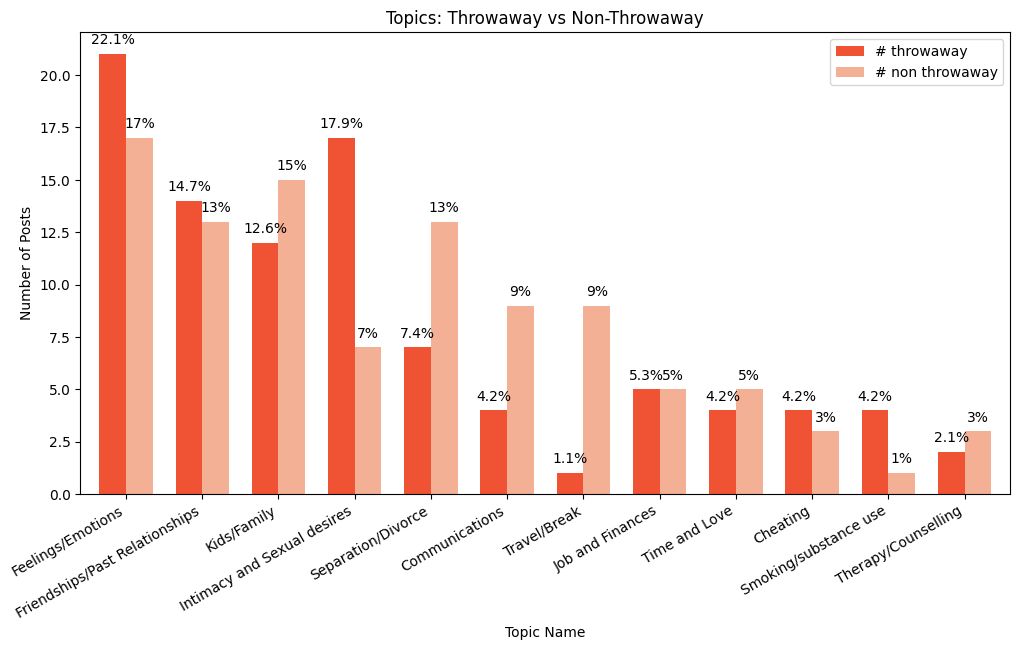

In [15]:
import matplotlib.pyplot as plt

# plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6)) 
final_representation.plot(x='topic_name', y=['count_thrw', 'count_non_thrw'], label = ['# throwaway', '# non throwaway'],
                          kind='bar', width=0.7, color=['#F05334', '#F4B095'], ax=ax)

# set the title and labels
ax.set_title('Topics: Throwaway vs Non-Throwaway')
ax.set_xlabel('Topic Name')
ax.set_ylabel('Number of Posts')

# add percentage labels on top of the bars
for p in ax.containers:
    count_values = p.datavalues
    total_count = sum(count_values)
    percentage_values = [count / total_count * 100 for count in count_values]
    ax.bar_label(p, label_type='edge', labels=[f'{round(percentage, 1):g}%' for count, percentage in zip(count_values, percentage_values)], padding=5)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
# show the plot
plt.show()

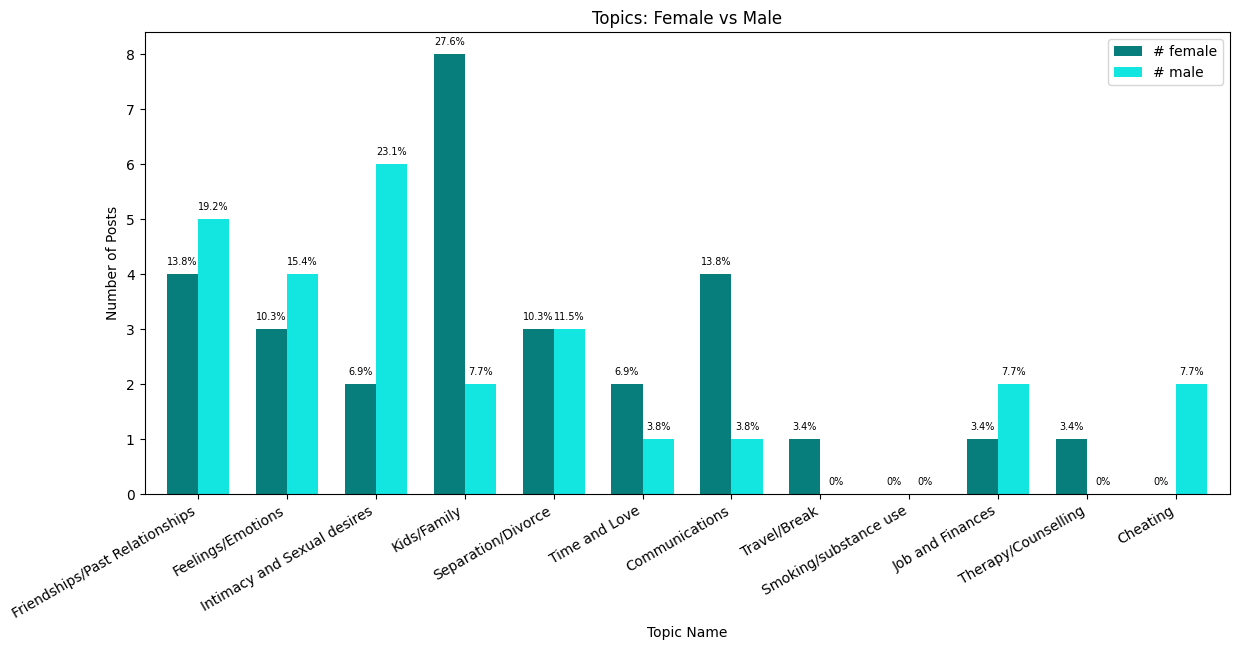

In [16]:
# plot the bar chart
fig, ax = plt.subplots(figsize=(14, 6)) 
topic_representations_final2.plot(x='topic_name', y=['count_female', 'count_male'], label = ['# female', '# male'],
                          kind='bar', width=0.7, color=['#077E7C', '#13E5E1'], ax=ax)

# set the title and labels
ax.set_title('Topics: Female vs Male')
ax.set_xlabel('Topic Name')
ax.set_ylabel('Number of Posts')

# add percentage labels on top of the bars
for p in ax.containers:
    count_values = p.datavalues
    total_count = sum(count_values)
    percentage_values = [count / total_count * 100 for count in count_values]
    ax.bar_label(p, label_type='edge', labels=[f'{round(percentage, 1):g}%' for count, percentage in zip(count_values, percentage_values)], 
                 padding=5, fontsize=7)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
# show the plot
plt.show()

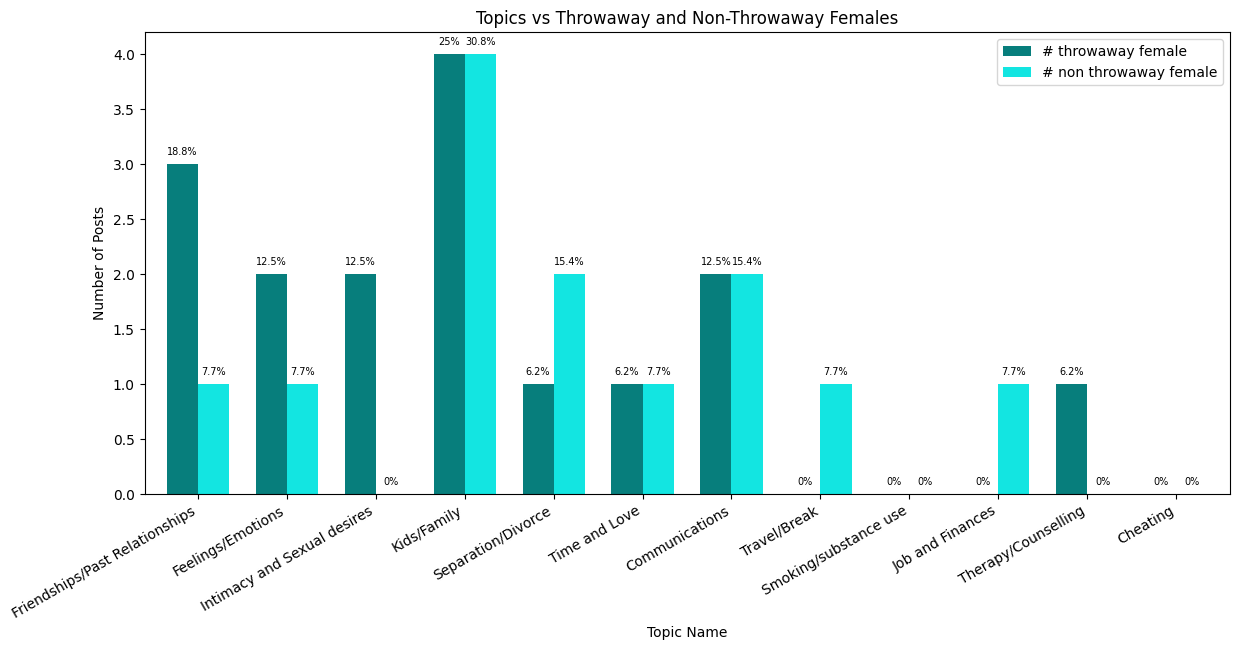

In [17]:
# plot the bar chart
fig, ax = plt.subplots(figsize=(14, 6)) 
topic_representations_final2.plot(x='topic_name', y=['count_thrw_female', 'count_non_thrw_female'], label = ['# throwaway female', '# non throwaway female'],
                          kind='bar', width=0.7, color=['#077E7C', '#13E5E1'], ax=ax)

# set the title and labels
ax.set_title('Topics vs Throwaway and Non-Throwaway Females')
ax.set_xlabel('Topic Name')
ax.set_ylabel('Number of Posts')

# add percentage labels on top of the bars
for p in ax.containers:
    count_values = p.datavalues
    total_count = sum(count_values)
    percentage_values = [count / total_count * 100 for count in count_values]
    ax.bar_label(p, label_type='edge', labels=[f'{round(percentage, 1):g}%' for count, percentage in zip(count_values, percentage_values)], 
                 padding=5, fontsize=7)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
# show the plot
plt.show()

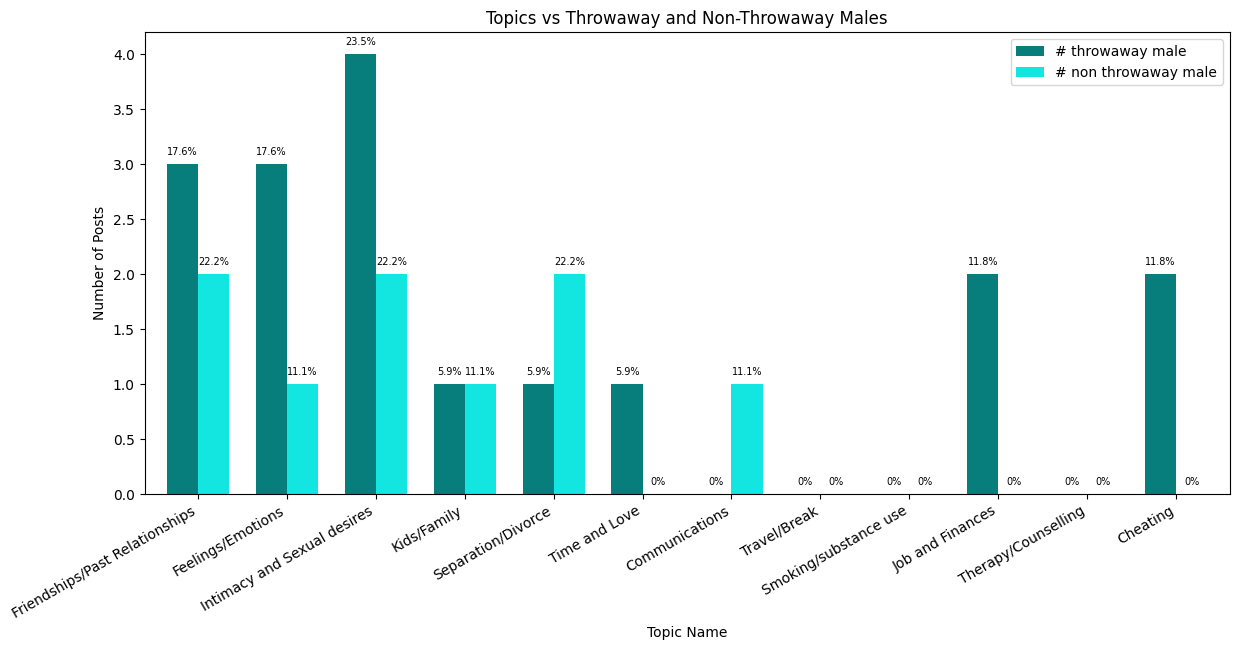

In [18]:
# plot the bar chart
fig, ax = plt.subplots(figsize=(14, 6)) 
topic_representations_final2.plot(x='topic_name', y=['count_thrw_male', 'count_non_thrw_male'], label = ['# throwaway male', '# non throwaway male'],
                          kind='bar', width=0.7, color=['#077E7C', '#13E5E1'], ax=ax)

# set the title and labels
ax.set_title('Topics vs Throwaway and Non-Throwaway Males')
ax.set_xlabel('Topic Name')
ax.set_ylabel('Number of Posts')

# add percentage labels on top of the bars
for p in ax.containers:
    count_values = p.datavalues
    total_count = sum(count_values)
    percentage_values = [count / total_count * 100 for count in count_values]
    ax.bar_label(p, label_type='edge', labels=[f'{round(percentage, 1):g}%' for count, percentage in zip(count_values, percentage_values)], 
                 padding=5, fontsize=7)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
# show the plot
plt.show()

# CHI - SQUARE TESTS

In [19]:
data_thrw_non_thrw = np.array([final_representation.count_thrw.tolist(),final_representation.count_non_thrw.tolist()])					
print(data_thrw_non_thrw)

print("#############")
data_female_male = np.array([topic_representations_final2.count_female.tolist(),topic_representations_final2.count_male.tolist()])
print(data_female_male)
all_zeros = np.all(data_female_male == 0, axis=0)
data_female_male = data_female_male[:, ~all_zeros]
print(data_female_male)

print("#############")
data_thrw_non_thrw_female = np.array([topic_representations_final2.count_thrw_female.tolist(),topic_representations_final2.count_non_thrw_female.tolist()])
print(data_thrw_non_thrw_female)
all_zeros = np.all(data_thrw_non_thrw_female == 0, axis=0)
data_thrw_non_thrw_female = data_thrw_non_thrw_female[:, ~all_zeros]
print(data_thrw_non_thrw_female)

print("#############")
data_thrw_non_thrw_male = np.array([topic_representations_final2.count_thrw_male.tolist(),topic_representations_final2.count_non_thrw_male.tolist()])
print(data_thrw_non_thrw_male)
all_zeros = np.all(data_thrw_non_thrw_male == 0, axis=0)
data_thrw_non_thrw_male = data_thrw_non_thrw_male[:, ~all_zeros]
print(data_thrw_non_thrw_male)

[[21 14 12 17  7  4  1  5  4  4  4  2]
 [17 13 15  7 13  9  9  5  5  3  1  3]]
#############
[[4. 3. 2. 8. 3. 2. 4. 1. 0. 1. 1. 0.]
 [5. 4. 6. 2. 3. 1. 1. 0. 0. 2. 0. 2.]]
[[4. 3. 2. 8. 3. 2. 4. 1. 1. 1. 0.]
 [5. 4. 6. 2. 3. 1. 1. 0. 2. 0. 2.]]
#############
[[3. 2. 2. 4. 1. 1. 2. 0. 0. 0. 1. 0.]
 [1. 1. 0. 4. 2. 1. 2. 1. 0. 1. 0. 0.]]
[[3. 2. 2. 4. 1. 1. 2. 0. 0. 1.]
 [1. 1. 0. 4. 2. 1. 2. 1. 1. 0.]]
#############
[[3. 3. 4. 1. 1. 1. 0. 0. 0. 2. 0. 2.]
 [2. 1. 2. 1. 2. 0. 1. 0. 0. 0. 0. 0.]]
[[3. 3. 4. 1. 1. 1. 0. 2. 2.]
 [2. 1. 2. 1. 2. 0. 1. 0. 0.]]


In [20]:
#print(topic_representations_final2.topic_name)

In [21]:
from scipy.stats import chisquare

print("######## Throw vs Non-Throw ###########")
print(np.round(chisquare(data_thrw_non_thrw).pvalue, 3))

print("######## Female vs Male ###########")
print(np.round(chisquare(data_female_male).pvalue, 3))

print("######## Throw-Female vs non-Throw-Female ###########")
print(np.round(chisquare(data_thrw_non_thrw_female).pvalue, 3))

print("######## Throw-Female vs Non-Throw-Male ###########")
print(np.round(chisquare(data_thrw_non_thrw_male).pvalue, 3))

######## Throw vs Non-Throw ###########
[0.516 0.847 0.564 0.041 0.18  0.166 0.011 1.    0.739 0.705 0.18  0.655]
######## Female vs Male ###########
[0.739 0.705 0.157 0.058 1.    0.564 0.18  0.317 0.564 0.317 0.157]
######## Throw-Female vs non-Throw-Female ###########
[0.317 0.564 0.157 1.    0.564 1.    1.    0.317 0.317 0.317]
######## Throw-Female vs Non-Throw-Male ###########
[0.655 0.317 0.414 1.    0.564 0.317 0.317 0.157 0.157]
